In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris_df = pd.read_csv('Iris (5).csv')
iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
print('size of the data :',iris_df.shape)

size of the data : (150, 5)


In [5]:
X=iris_df.drop('Species',axis=1)
y=iris_df['Species']

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
decision_tree=DecisionTreeClassifier(random_state=6)

In [8]:
decision_tree.fit(X,y)

DecisionTreeClassifier(random_state=6)

In [9]:
predictions=decision_tree.predict(X)
predictions

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [10]:
from sklearn.metrics import accuracy_score


In [11]:
print('Dicision tree Accuracy:',accuracy_score(y,predictions))

Dicision tree Accuracy: 1.0


In [12]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.tree import export_graphviz
import graphviz

In [14]:
X.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'], dtype='object')

In [15]:
decision_tree.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [16]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

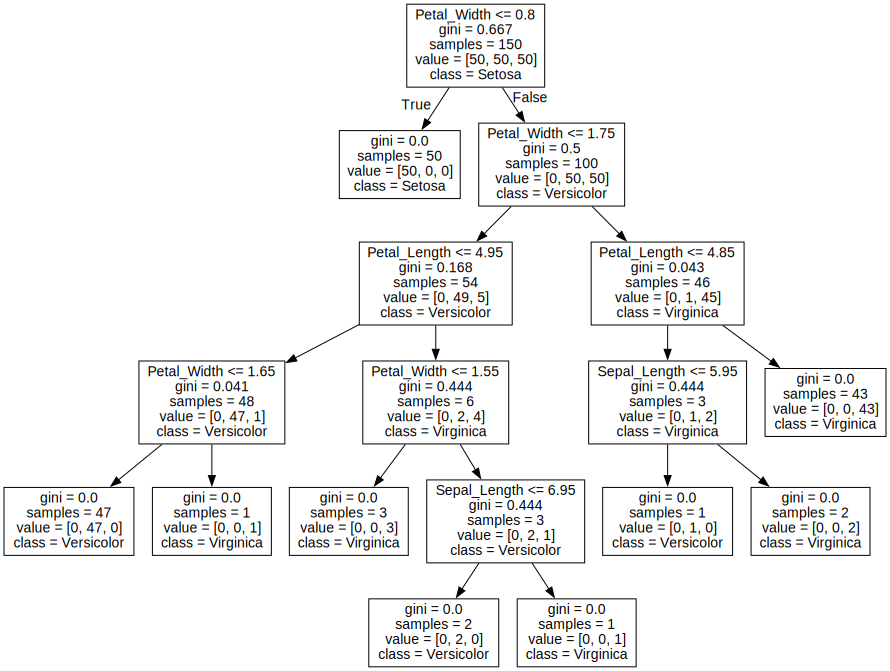

In [17]:
viz_data = export_graphviz(decision_tree,feature_names = X.columns, class_names = decision_tree.classes_)
tree = graphviz.Source(viz_data)
tree

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

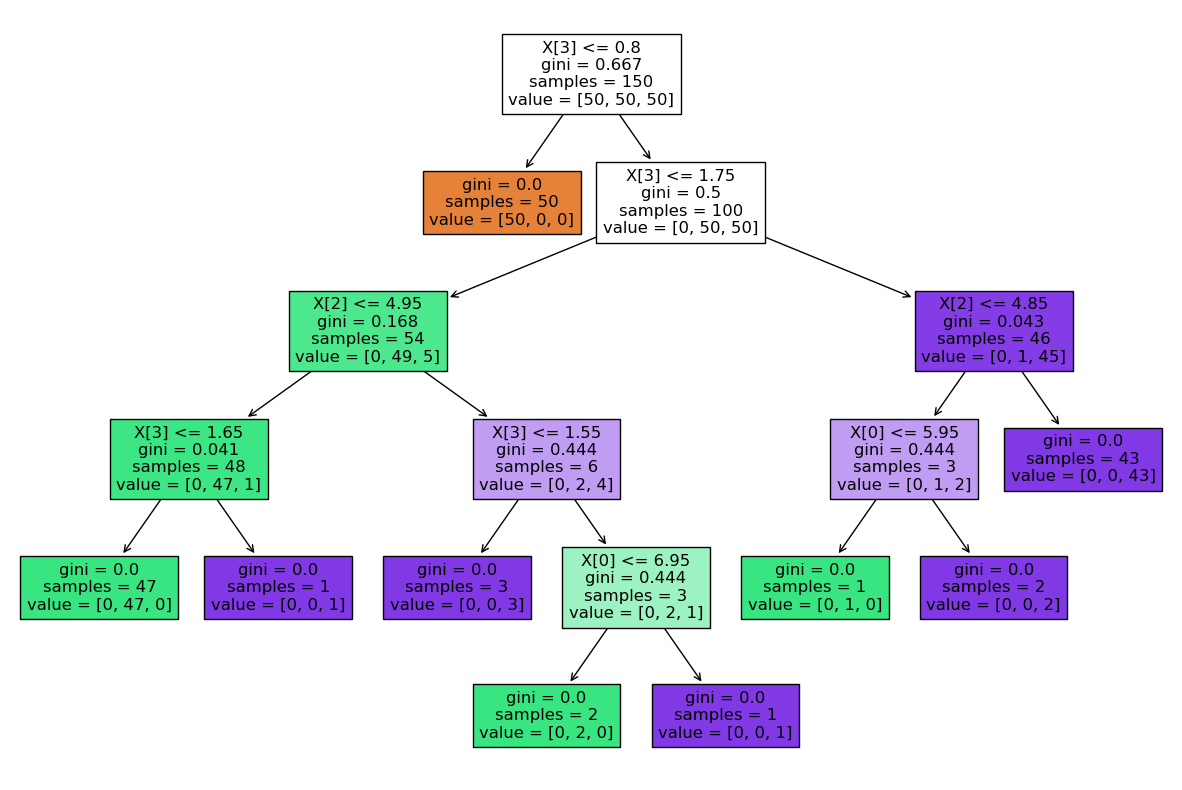

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(decision_tree,filled=True)

### feature importance

In [19]:
fe_importances = pd.DataFrame({'feature' :X. columns, 'importance' : np. round (decision_tree.feature_importances_, 3)})
fe_importances= fe_importances.sort_values('importance', ascending=False)
fe_importances

,feature,importance
3,Petal_Width,0.923
2,Petal_Length,0.051
0,Sepal_Length,0.027
1,Sepal_Width,0.000


## Hyperparameter tuning

#### max_depth

In [20]:
dt_clf= DecisionTreeClassifier(max_depth = 2, random_state = 3)
dt_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=3)

In [21]:
predictions=dt_clf.predict(X)
print('Dicision Tree Accuracy: ',accuracy_score(y,predictions))

Dicision Tree Accuracy:  0.96


In [22]:
max_depth_range =list (range(1, 6))
accuracies = []
for depth in max_depth_range:
    dt_clf =DecisionTreeClassifier (max_depth = depth, random_state = 3)
    dt_clf.fit(X, y)
    predictions = dt_clf.predict(X) 
    accuracy =accuracy_score (y, predictions)
    accuracies.append(accuracy)

In [24]:
from sklearn.model_selection import cross_validate

In [25]:
dic_tree=DecisionTreeClassifier(max_depth=6)

In [31]:
cv_result=cross_validate(dic_tree,X,y,cv=5,return_train_score=True)

In [32]:
cv_result

{'fit_time': array([0.00812054, 0.        , 0.00345278, 0.0032146 , 0.        ]),
 'score_time': array([0.        , 0.0118463 , 0.00203276, 0.        , 0.        ]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [33]:
print('training data average accuracy',cv_result['train_score'].mean())

print('validation data average accuracy',cv_result['test_score'].mean())

training data average accuracy 1.0
validation data average accuracy 0.9666666666666668


In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
dici_tree=DecisionTreeClassifier()

In [36]:
param_grid={'max_depth':np.arange(1,6)}

In [37]:
dt_with_gs=GridSearchCV(dici_tree,param_grid,return_train_score=True,verbose=1,scoring='accuracy')

In [38]:
dt_with_gs.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5])},
             return_train_score=True, scoring='accuracy', verbose=1)

In [39]:
dt_with_gs.cv_results_

{'mean_fit_time': array([0.00146627, 0.00745578, 0.00156074, 0.        , 0.        ]),
 'std_fit_time': array([0.00182189, 0.00680243, 0.00078195, 0.        , 0.        ]),
 'mean_score_time': array([0.00040474, 0.00104847, 0.00085168, 0.00312538, 0.        ]),
 'std_score_time': array([0.00080948, 0.00111364, 0.00043003, 0.00625076, 0.        ]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5}],
 'split0_test_score': array([0.66666667, 0.93333333, 0.96666667, 0.96666667, 0.96666667]),
 'split1_test_score': array([0.66666667, 0.96666667, 0.96666667, 0.96666667, 0.96666667]),
 'split2_test_score': array([0.66666667, 0.9       , 0.93333333, 0.9       , 0.9       ]),
 'split3_test_score': array([0.66666667, 0.86666667, 0.93333333, 0.96666667, 0.96666667]),
 'split4_tes

In [40]:
tuned_df=pd.DataFrame(dt_with_gs.cv_results_)
tuned_df=tuned_df[['param_max_depth','mean_train_score','mean_test_score']]
tuned_df

,param_max_depth,mean_train_score,mean_test_score
0,1,0.666667,0.666667
1,2,0.961667,0.933333
2,3,0.973333,0.960000
3,4,0.988333,0.960000
4,5,0.998333,0.960000


In [45]:
dt_11=DecisionTreeClassifier(max_depth=4)
dt_11.fit(X,y)
predictions=dt_11.predict(X)
test_accuracy=accuracy_score(y,predictions)
test_accuracy

0.9933333333333333

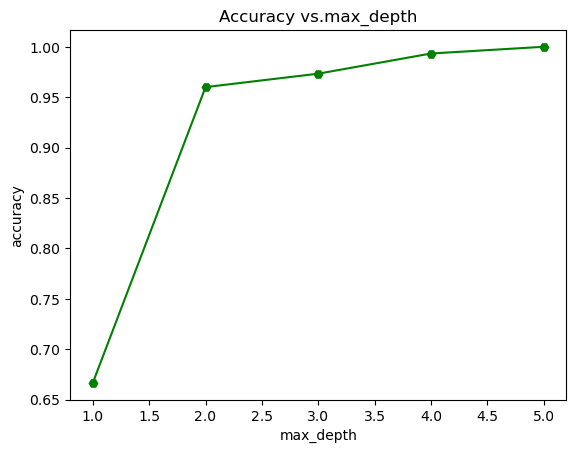

In [23]:
plt.plot(max_depth_range,accuracies, marker='H',color='g')
plt.title('Accuracy vs.max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()